**Problema Nro. 3**

Supongamos que hay tres tablas en una base de datos relacional llamadas `employees`, `works_in` y `department`.  
La tabla `employees` tiene los campos: `id`, `first_name`, `last_name`, `date_of_birth`.  
La tabla `departments` tiene dos campos: `department_id` y `department_name`.  
La tabla `works_in` tiene los campos `employee_id` y `department_id`, que proporciona la información sobre el departamento en el que trabaja un empleado.  
Escribe una consulta SQL usando estas tablas y obtén una tabla que devuelva los campos: `first_name`, `last_name`, `department_name`.  
La tabla devuelta muestra el nombre exacto del empleado y el departamento en el que trabaja.





**Creación del Diagrama Entidad relación, según el planteamiento del problema3**

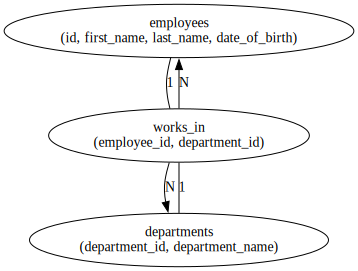

In [ ]:
from graphviz import Digraph #paquete python-graphviz para crear graficos

er = Digraph('ER', format='png') # Crear un objeto Digraph

# Entities - Tablas
er.node('Employees', 'employees\n(id, first_name, last_name, date_of_birth)') # Definir la tabla Employees
er.node('Departments', 'departments\n(department_id, department_name)') # Definir la tabla Departments
er.node('Works_in', 'works_in\n(employee_id, department_id)') # Definir la tabla Works_in

# Relationships - relaciones entre tablas
er.edge('Employees', 'Works_in', label='1', arrowhead='none') # Definir la relación entre Employees y Works_in
er.edge('Works_in', 'Employees', label='N', arrowhead='normal') # Definir la relación entre Works_in y Employees

er.edge('Departments', 'Works_in', label='1', arrowhead='none') #
er.edge('Works_in', 'Departments', label='N', arrowhead='normal') #

er.render('er_diagram', view=True) # Renderizar el gráfico y abrirlo en el visualizador predeterminado
er # Renderizar el gráfico en formato PNG 
er.view() # Abrir el gráfico en el visualizador predeterminado

**Consulta para el problema 3**

In [ ]:
SELECT e.first_name, e.last_name, d.department_name 
FROM employees e
JOIN works_in w ON e.id = w.employee_id
JOIN departments d ON w.department_id = d.department_id; 

**Problema Nro. 4**

Considera el archivo tSV, llamado `"imdb_ratings.tsv"` adjunto a este cuaderno.  
Una parte importante de esta tarea es tener en cuenta que los datos en el archivo tSV tienen dos columnas: `stars_ratings`, que es un número decimal, y `actors`, que es una cadena de actores (separados por comas) que actuaron en la película.  
No es importante cuántas y cuáles otras columnas estén presentes.  
Escribe una función `actors_total_movies` que tome los siguientes dos argumentos:

1. `filename`, que es el nombre del archivo TSV a leer.
2. `actor`, que es el nombre del actor para filtrar.

La función `actors_total_movies` devuelve el total de películas en las que el `actor` está presente y tiene una calificación listada en el archivo de datos.

In [13]:
import pandas as pd #pandas es una biblioteca de Python para la manipulación y análisis de datos

def actors_total_movies(filename, actor): #creando el método actors_total_movies
    """
    Cuenta el número de películas en las que aparece el actor y tiene calificación.
    Args:
        filename (str): nombre del archivo TSV.
        actor (str): nombre del actor a buscar.
    Returns:
        int: número de películas en las que aparece el actor.
    """
    df = pd.read_csv(filename, sep='\t') #lee el archivo TSV y lo carga en un DataFrame de pandas
    df.columns = df.columns.str.strip() #elimina los espacios en blanco de los nombres de las columnas
    # Verificar si el archivo se ha cargado correctamente                   
    count = 0 #inicializa el contador en 0
    for _, row in df.iterrows(): # iterar sobre cada fila del DataFrame
        if pd.notnull(row['stars_rating']) and pd.notnull(row['actors']): #verifica si las columnas 'stars_ratings' y 'actors' no son nulas
            # Verifica si el actor está en la lista de actores
            actors_str = row['actors'].strip('{}') #elimina los caracteres '{' y '}' de la cadena
            # Convierte la cadena de actores en una lista
            actors_list = [a.strip().strip('"') for a in actors_str.split(',')]
            # Verifica si el actor está en la lista de actores
            # y si la calificación es mayor a 0
            if actor in actors_list:
                count += 1
    return count

Ahora llamamos al método para ver el resultado del problema 4, empleando el método: actors_total_movies()

In [14]:
# Empleando el archivo que se llama "imdb_ratings.tsv" y quieres buscar a "Patrick Stewart"
total = actors_total_movies("imdb_ratings.tsv", "Patrick Stewart")
print(f"Total de películas con Patrick Stewart: {total}")

Total de películas con Patrick Stewart: 4
